Splitting Data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as split_data
data_awal = pd.read_csv('/Mob_App_SIHAPIN/ML/Dataset/pond_iot_2023_raw.csv')

In [30]:
# hapus date pada data
data_bersih = data_awal.drop(columns=['id'])
data_bersih['created_date'] = pd.to_datetime(data_bersih['created_date'], errors='coerce')
data_bersih.head()

,created_date,water_pH,TDS,water_temp
0,2023-01-26 10:38:00,7.94,329,23.69
1,2023-01-26 10:38:00,7.79,329,23.69
2,2023-01-26 10:39:00,5.98,233,23.75
3,2023-01-26 10:39:00,7.32,233,23.75
4,2023-01-26 10:39:00,7.90,233,23.75


In [31]:
#cek data null 
print(data_bersih.isnull().sum())

created_date    0
water_pH        0
TDS             0
water_temp      0
dtype: int64


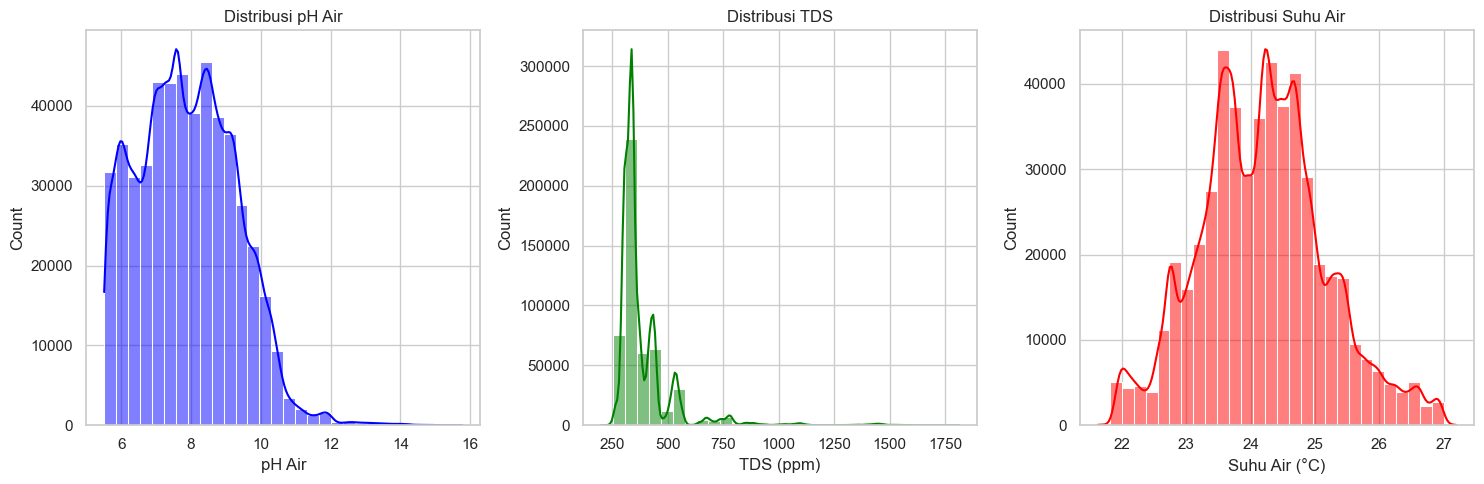

In [32]:
# visualisasikan data yang sudah dibersihkan

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 3, 1)
sns.histplot(data_bersih['water_pH'], bins=30, kde=True, color='blue')
plt.xlabel('pH Air')
plt.title('Distribusi pH Air')

plt.subplot(1, 3, 2)
sns.histplot(data_bersih['TDS'], bins=30, kde=True, color='green')
plt.xlabel('TDS (ppm)')
plt.title('Distribusi TDS')

plt.subplot(1, 3, 3)
sns.histplot(data_bersih['water_temp'], bins=30, kde=True, color='red')
plt.xlabel('Suhu Air (°C)')
plt.title('Distribusi Suhu Air')

plt.tight_layout()
plt.show()

In [55]:
# Drop missing values (NA handling)
data = data.dropna()

# Pastikan semua data numerik
data = data.select_dtypes(include=["number"])

In [75]:
# Splitting data sebelum klasifikasi
X = data_bersih[["water_pH", "TDS", "water_temp"]]
X_train, X_test = split_data(X, test_size=0.2, random_state=42)

In [76]:
#klasifikasi data menurut parameter yang dipakai pada model 

def classify_pH(pH):
    if pH < 7.2:
        return 'Naikkan pH air'
    elif pH > 7.8:
        return 'Turunkan pH air'
    else:
        return 'Pertahankan pH air'

def classify_TDS(TDS):
    if TDS < 250:
        return 'TDS rendah, tingkatkan kualitas air anda'
    elif TDS > 450:
        return 'TDS Tinggi, Ubah sumber air anda'
    else:
        return 'Pertahankan Sumber air anda'

def classify_temp(temp):
    if temp < 24.0:
        return 'Naikkan temperatur air'
    elif temp > 28.0:
        return 'turunkan temperatur air'
    else:
        return 'pertahankan temperatur air'

In [77]:
# Terapkan klasifikasi hanya pada data train
y_train = pd.DataFrame({
    "recommendation_pH": X_train["water_pH"].apply(classify_pH),
    "recommendation_TDS": X_train["TDS"].apply(classify_TDS),
    "recommendation_temp": X_train["water_temp"].apply(classify_temp)
})


In [78]:
#simpan data train dan test pada folder
X_train.assign(recommendation_pH=y_train['recommendation_pH'], 
               recommendation_TDS=y_train['recommendation_TDS'], 
               recommendation_temp=y_train['recommendation_temp']).to_csv("data_train/data_train.csv", index=False)
X_test.to_csv("data_uji/data_uji.csv", index=False)  # Data test tanpa label rekomendasi